In [ ]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd

# Inisialisasi Spark
spark = SparkSession.builder.appName("IrisAnalysis").getOrCreate()

# Load dataset
# Gunakan salah satu dari: lokal / HDFS / absolut
# df = spark.read.csv("hdfs://localhost:9000/user/iris/iris.csv", header=True, inferSchema=True)
df = spark.read.csv("iris.csv", header=True, inferSchema=True)

# Tampilkan schema dan sampel data
df.printSchema()
df.show(5)

# Hitung jumlah record per spesies
df.groupBy("Species").count().show()

# Konversi ke pandas
pdf = df.toPandas()

# Visualisasi sepal length vs width
plt.figure(figsize=(8,6))
for sp in pdf["Species"].unique():
    subset = pdf[pdf["Species"] == sp]
    plt.scatter(subset["SepalLengthCm"], subset["SepalWidthCm"], label=sp)

plt.title("Sepal Length vs Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.savefig("sepal_scatter.png")

spark.stop()

: 

=== Data Iris ===
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

=== Info DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)


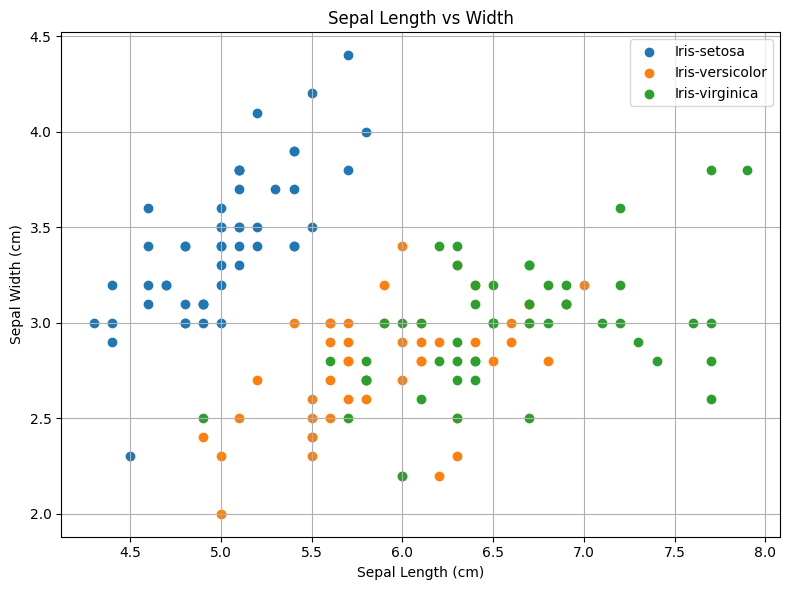

In [ ]:
from pyarrow import fs
import pandas as pd
import matplotlib.pyplot as plt

# # 1. Inisialisasi koneksi ke HDFS
# hdfs = fs.HadoopFileSystem(
#     host="localhost",  # Sesuaikan dengan konfigurasi Hadoop Anda
#     port=9000,
#     user="jailani"     # Ganti dengan user HDFS Anda
# )

# 2. Baca file iris.csv dari HDFS
# with hdfs.open_input_file("/input/iris.csv") as f:
df = pd.read_csv("iris.csv")

# 3. Tampilkan beberapa baris pertama
print("=== Data Iris ===")
print(df.head())

# 4. Tampilkan informasi struktur data
print("\n=== Info DataFrame ===")
print(df.info())

# 5. Hitung jumlah record per spesies
print("\n=== Jumlah per Spesies ===")
print(df['Species'].value_counts())

# 6. Visualisasi sepal_length vs sepal_width
plt.figure(figsize=(8, 6))
for sp in df["Species"].unique():
    subset = df[df["Species"] == sp]
    plt.scatter(subset["SepalLengthCm"], subset["SepalWidthCm"], label=sp)

plt.title("Sepal Length vs Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("hasil_sepal_scatter.png")
print("\nVisualisasi disimpan sebagai 'hasil_sepal_scatter.png'")